# 1. Import the required libraries

In [ ]:
##---------Type the code below this line------------------##
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# 2. Data Acquisition

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [ ]:
##---------Type the code below this line------------------##

# Load the Plant Village dataset and split into training and testing subsets
ds_load, ds_info = tfds.load('plant_village', with_info=True, as_supervised=True, split=['train[:80%]', 'train[80%:]'])

# Print class names
class_names = ds_info.features['label'].names
print("Class names:", class_names)

# Print dataset information
print(ds_info)
print(f"DATASET: {ds_load}")

# Print dataset information
print(f"Number of examples in dataset: {ds_info.splits['train'].num_examples}")

Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___healthy', 'Cherry___Powdery_mildew', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___healthy', 'Corn___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus

## 2.1 Observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



**Answers :**
1. Size: The dataset contains 54,303 images.
2. Data Attributes: We have images and corresponding disease labels.
3. Classifying: We are building a multi-class classification model to identify plant diseases based on leaf images.
4. Plot Distribution: section 3.3

# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded.
This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techniques

* rescale images
* Normalizing pixel values
* Data agumentation

In [ ]:
##---------Type the code below this line------------------##

BATCH_SIZE = 32
IMG_HEIGHT = 64
IMG_WIDTH = 64

def preprocess(image, label):
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = image / 255.0
    return image, label
    # Apply the preprocessing to the datasets
train_ds = ds_load[0].map(preprocess).shuffle(1000).batch(BATCH_SIZE)
val_ds = ds_load[1].map(preprocess).batch(BATCH_SIZE)

In [ ]:
##---------Type the code below this line------------------##
train_images = []
train_labels = []

# Efficiently create NumPy arrays
train_images = np.concatenate([image.numpy() for image, _ in train_ds])
train_labels = np.concatenate([label.numpy() for _, label in train_ds])

print('Traning Image and Label')
print(train_images.shape)  # (number_of_training_images, IMG_HEIGHT, IMG_WIDTH, 3)
print(train_labels.shape)

# Efficiently create NumPy arrays
val_ds_images = np.concatenate([image.numpy() for image, _ in val_ds])
val_ds_labels = np.concatenate([label.numpy() for _, label in val_ds])

print('Validation Image and Label')
print(val_ds_images.shape)  #  (number_of_training_images, IMG_HEIGHT, IMG_WIDTH, 3)
print(val_ds_labels.shape)

Traning Image and Label
(43442, 64, 64, 3)
(43442,)
Validation Image and Label
(10861, 64, 64, 3)
(10861,)


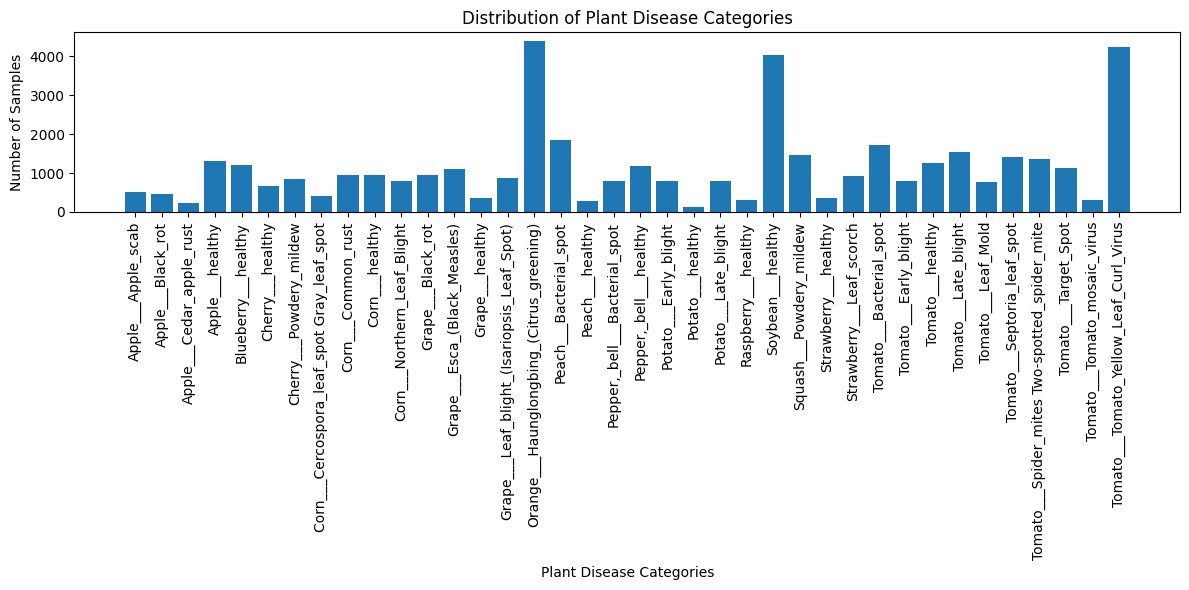

In [ ]:
# --- Distribution of Categories ---
labels = np.concatenate([y for x, y in train_ds])
unique_labels, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(12, 6))
plt.bar(class_names, counts)
plt.xlabel('Plant Disease Categories')
plt.ylabel('Number of Samples')
plt.title('Distribution of Plant Disease Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 3.3 Split the data into training set and testing

In [ ]:
##---------Type the code below this line------------------##

# Traning and validation step already performed above
#train_ds = ds_load[0].map(preprocess).shuffle(1000).batch(BATCH_SIZE)
#val_ds = ds_load[1].map(preprocess).batch(BATCH_SIZE)



## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used

Report the size of the training dataset and testing dataset


In [ ]:
##---------Type the answer below this line------------------##
# Print the size of training and validation datasets
print(f"Number of batches in training dataset: {len(train_ds)}")
print(f"Number of batches in validation dataset: {len(val_ds)}")

Number of batches in training dataset: 1358
Number of batches in validation dataset: 340


# 4. Deep Neural Network Architecture 


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [ ]:
##---------Type the code below this line------------------##
# Build the DNN model

num_classes = 5

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])


## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [ ]:
# Number of layers
print("Number of layers:", len(model.layers))

# Number of units in each layer (only for Dense layers)
for layer in model.layers:
    if 'dense' in layer.name:  # Check if the layer is a Dense layer
        print("Number of units in layer", layer.name, ":", layer.units)


Number of layers: 5
Number of units in layer dense_6 : 128
Number of units in layer dense_7 : 64
Number of units in layer dense_8 : 38


1. Layers: Your current model has 5 layers (including input, flattening, and output).
2. Units: You have 128 units in the first dense layer, 64 in the second, and the final layer has the same number of units as your number of classes.
3.  a. Total params: 1583718 (6.04 MB)
    b. Trainable params: 1583718 (6.04 MB)
    c. Non-trainable params: 0 (0.00 Byte)

# 5. Training the model


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [ ]:
##---------Type the code below this line------------------##
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [ ]:
##---------Type the code below this line------------------##
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1358/1358 [==============================] - 38s 27ms/step - loss: 2.5945 - accuracy: 0.2903 - val_loss: 2.1599 - val_accuracy: 0.3809
Epoch 2/20
1358/1358 [==============================] - 33s 24ms/step - loss: 1.9942 - accuracy: 0.4374 - val_loss: 1.8564 - val_accuracy: 0.4744
Epoch 3/20
1358/1358 [==============================] - 35s 25ms/step - loss: 1.7259 - accuracy: 0.5161 - val_loss: 1.5921 - val_accuracy: 0.5493
Epoch 4/20
1358/1358 [==============================] - 37s 27ms/step - loss: 1.5443 - accuracy: 0.5593 - val_loss: 1.4535 - val_accuracy: 0.5834
Epoch 5/20
1358/1358 [==============================] - 35s 25ms/step - loss: 1.4223 - accuracy: 0.5910 - val_loss: 1.3771 - val_accuracy: 0.6014
Epoch 6/20
1358/1358 [==============================] - 41s 30ms/step - loss: 1.3176 - accuracy: 0.6181 - val_loss: 1.2640 - val_accuracy: 0.6343
Epoch 7/20
1358/1358 [==============================] - 35s 26ms/step - loss: 1.2277 - accuracy: 0.6389 - val_loss: 1.2319 - val_accura

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 128)               1572992   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 38)                2470      
                                                                 
Total params: 1583718 (6.04 MB)
Trainable params: 1583718 (6.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 6. Test the model


In [ ]:
##---------Type the answers below this line------------------##
loss, accuracy = model.evaluate(val_ds, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.9924012422561646
Test accuracy: 0.7044470906257629


# 7. Intermediate result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


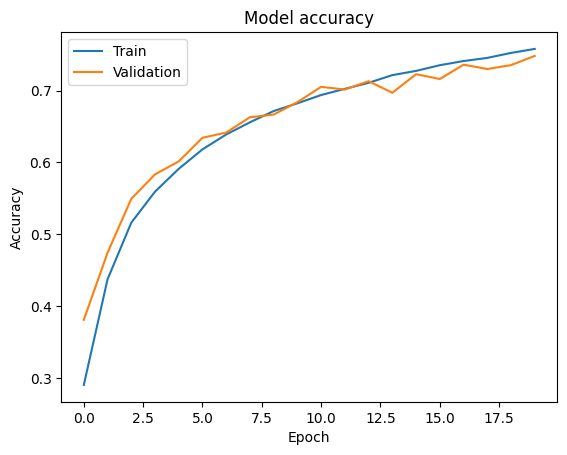

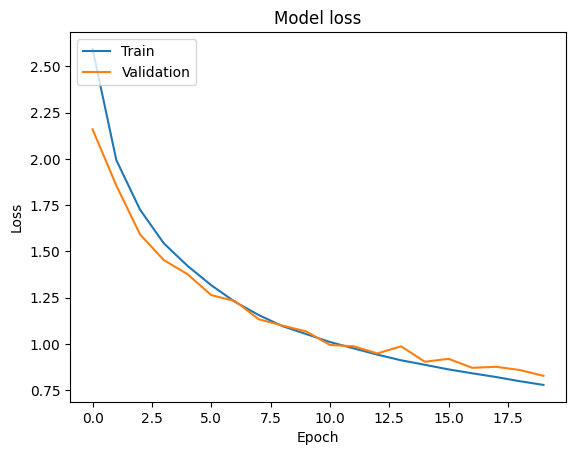

340/340 - 5s - loss: 0.8280 - accuracy: 0.7482 - 5s/epoch - 14ms/step

Test accuracy: 0.7481815814971924

Test loss: 0.8280413746833801
340/340 [==============================] - 6s 17ms/step


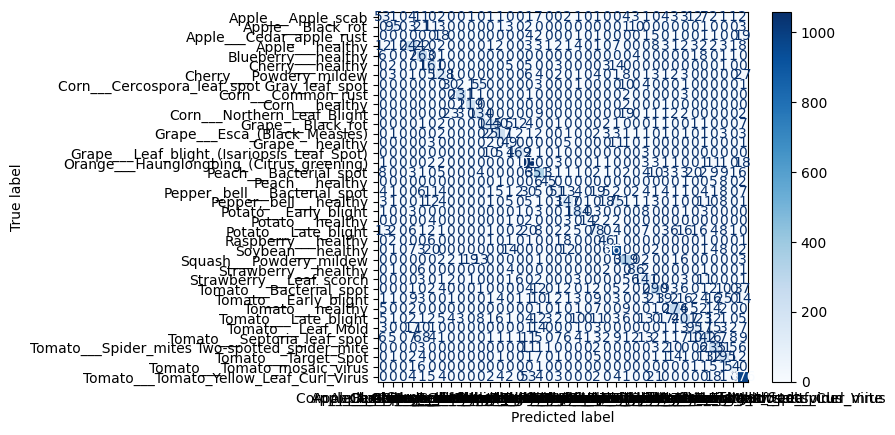

                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.44      0.41      0.42       129
                            Apple___Black_rot       0.80      0.62      0.70       154
                     Apple___Cedar_apple_rust       0.00      0.00      0.00        54
                              Apple___healthy       0.76      0.72      0.74       339
                          Blueberry___healthy       0.60      0.90      0.72       292
                             Cherry___healthy       0.64      0.83      0.72       195
                      Cherry___Powdery_mildew       0.67      0.64      0.65       201
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.48      0.28      0.35       108
                           Corn___Common_rust       0.96      0.97      0.96       239
                               Corn___healthy       0.90      0.98      0.94       223
                  Corn___Northern_Leaf_Bli

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Report the testing accuracy and loss
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# Show Confusion Matrix for testing dataset
predictions = model.predict(val_ds)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.concatenate([y for x, y in val_ds], axis=0)
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Report values for performance study metrics
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# 8. Model architecture


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [ ]:
# Model with one less layer (8.1)
model_8_1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

model_8_1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history_8_1 = model_8_1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
1358/1358 [==============================] - 31s 22ms/step - loss: 2.9451 - accuracy: 0.2323 - val_loss: 2.4587 - val_accuracy: 0.3330
Epoch 2/20
1358/1358 [==============================] - 30s 22ms/step - loss: 2.2829 - accuracy: 0.3680 - val_loss: 2.1290 - val_accuracy: 0.4043
Epoch 3/20
1358/1358 [==============================] - 29s 21ms/step - loss: 2.0462 - accuracy: 0.4311 - val_loss: 1.9411 - val_accuracy: 0.4669
Epoch 4/20
1358/1358 [==============================] - 28s 21ms/step - loss: 1.8832 - accuracy: 0.4840 - val_loss: 1.8037 - val_accuracy: 0.5012
Epoch 5/20
1358/1358 [==============================] - 30s 22ms/step - loss: 1.7540 - accuracy: 0.5192 - val_loss: 1.6813 - val_accuracy: 0.5388
Epoch 6/20
1358/1358 [==============================] - 29s 21ms/step - loss: 1.6527 - accuracy: 0.5454 - val_loss: 1.5920 - val_accuracy: 0.5602
Epoch 7/20
1358/1358 [==============================] - 31s 22ms/step - loss: 1.5702 - accuracy: 0.5659 - val_loss: 1.5252 -

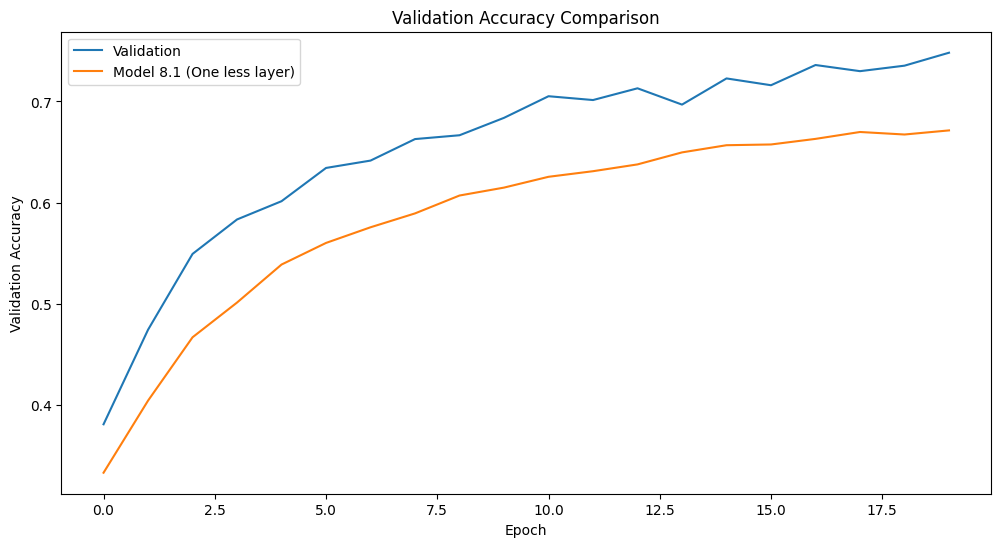

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history_8_1.history['val_accuracy'], label='Model 8.1 (One less layer)')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Model with one more layer (8.2)
model_8_2 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),  # Added layer
    tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

model_8_2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history_8_2 = model_8_2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
1358/1358 [==============================] - 37s 26ms/step - loss: 2.6302 - accuracy: 0.2662 - val_loss: 2.2298 - val_accuracy: 0.3555
Epoch 2/20
1358/1358 [==============================] - 36s 26ms/step - loss: 2.0570 - accuracy: 0.4131 - val_loss: 1.8763 - val_accuracy: 0.4626
Epoch 3/20
1358/1358 [==============================] - 41s 30ms/step - loss: 1.7650 - accuracy: 0.4948 - val_loss: 1.6581 - val_accuracy: 0.5285
Epoch 4/20
1358/1358 [==============================] - 35s 26ms/step - loss: 1.6038 - accuracy: 0.5393 - val_loss: 1.5468 - val_accuracy: 0.5497
Epoch 5/20
1358/1358 [==============================] - 36s 27ms/step - loss: 1.4921 - accuracy: 0.5633 - val_loss: 1.4672 - val_accuracy: 0.5655
Epoch 6/20
1358/1358 [==============================] - 35s 25ms/step - loss: 1.3974 - accuracy: 0.5859 - val_loss: 1.4092 - val_accuracy: 0.5805
Epoch 7/20
1358/1358 [==============================] - 35s 26ms/step - loss: 1.2991 - accuracy: 0.6133 - val_loss: 1.2808 -

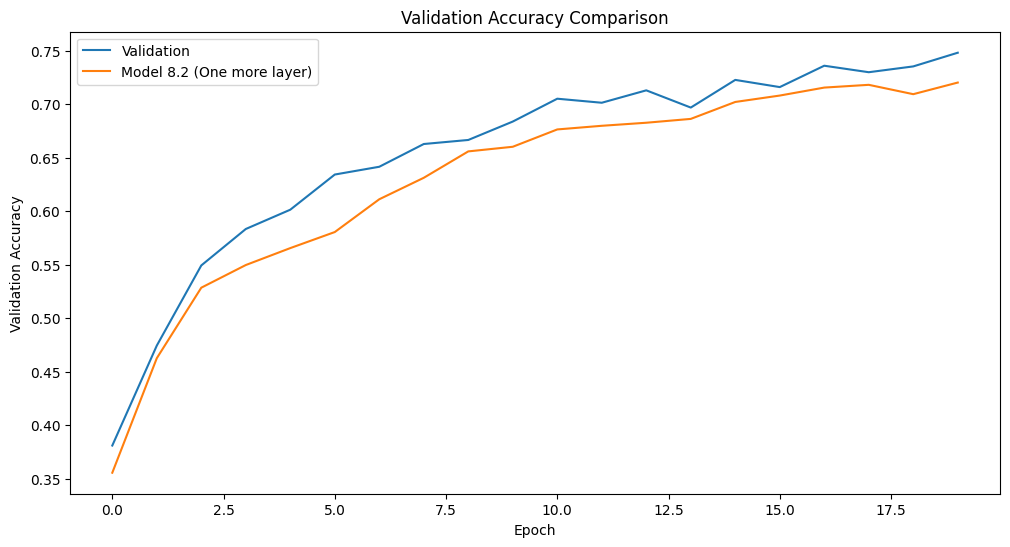

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history_8_2.history['val_accuracy'], label='Model 8.2 (One more layer)')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

Comparison of all three Model with validation data



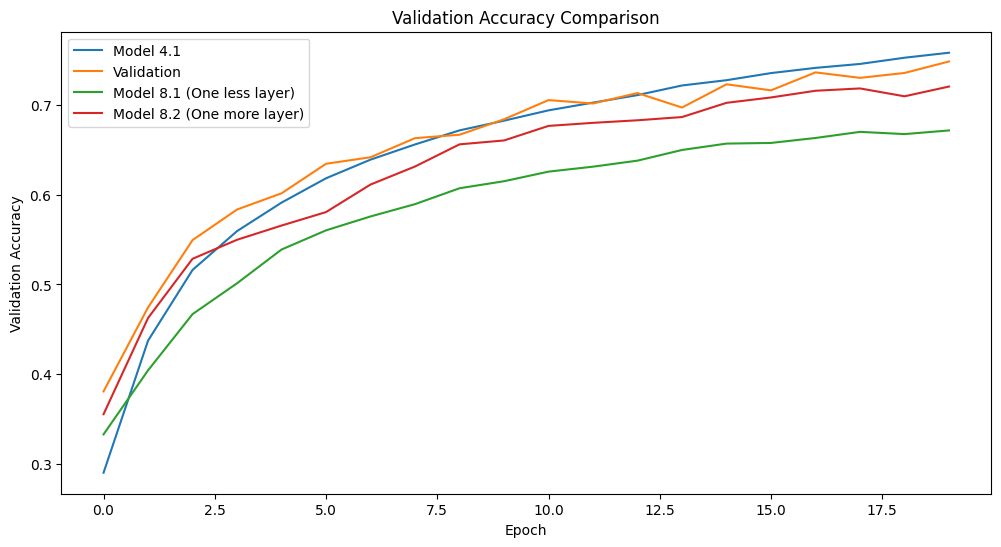

In [ ]:
# Plot the comparison

print('Comparison of all three Model with validation data')
print('')
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'] ,label='Model 4.1')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history_8_1.history['val_accuracy'], label='Model 8.1 (One less layer)')
plt.plot(history_8_2.history['val_accuracy'], label='Model 8.2 (One more layer)')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# 9. Regularisations

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [ ]:
##---------Type the code below this line------------------##
model_dropout = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

model_dropout.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

history_dropout = model_dropout.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
1358/1358 [==============================] - 49s 35ms/step - loss: 2.8196 - accuracy: 0.2330 - val_loss: 2.2942 - val_accuracy: 0.3651
Epoch 2/20
1358/1358 [==============================] - 35s 26ms/step - loss: 2.2884 - accuracy: 0.3497 - val_loss: 2.0093 - val_accuracy: 0.4366
Epoch 3/20
1358/1358 [==============================] - 34s 25ms/step - loss: 2.0613 - accuracy: 0.4120 - val_loss: 1.7610 - val_accuracy: 0.4985
Epoch 4/20
1358/1358 [==============================] - 35s 26ms/step - loss: 1.9008 - accuracy: 0.4527 - val_loss: 1.6564 - val_accuracy: 0.5101
Epoch 5/20
1358/1358 [==============================] - 35s 25ms/step - loss: 1.7944 - accuracy: 0.4788 - val_loss: 1.5310 - val_accuracy: 0.5510
Epoch 6/20
1358/1358 [==============================] - 39s 28ms/step - loss: 1.7067 - accuracy: 0.5005 - val_loss: 1.4263 - val_accuracy: 0.5778
Epoch 7/20
1358/1358 [==============================] - 41s 30ms/step - loss: 1.6442 - accuracy: 0.5164 - val_loss: 1.3571 -

Comparison of Dropout Model with validation data



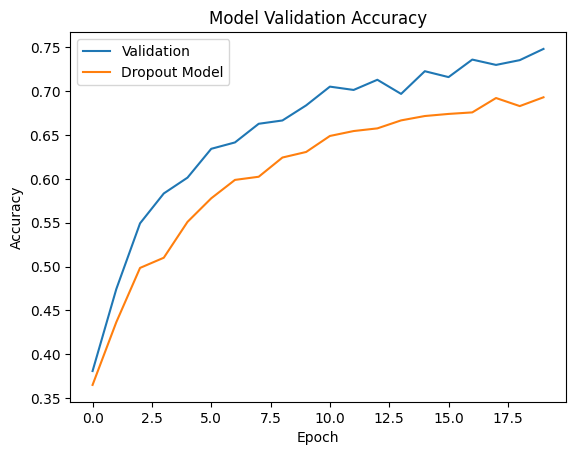

In [ ]:
# Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)
print('Comparison of Dropout Model with validation data')
print('')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Model')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
model_dropout_l2 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-04)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-04)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

model_dropout_l2.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

history_dropout_l2 = model_dropout_l2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)


Epoch 1/20
1358/1358 [==============================] - 39s 28ms/step - loss: 2.9614 - accuracy: 0.2229 - val_loss: 2.5475 - val_accuracy: 0.3107
Epoch 2/20
1358/1358 [==============================] - 35s 25ms/step - loss: 2.5273 - accuracy: 0.3186 - val_loss: 2.3430 - val_accuracy: 0.3901
Epoch 3/20
1358/1358 [==============================] - 36s 26ms/step - loss: 2.3588 - accuracy: 0.3663 - val_loss: 2.1271 - val_accuracy: 0.4319
Epoch 4/20
1358/1358 [==============================] - 36s 26ms/step - loss: 2.2174 - accuracy: 0.4065 - val_loss: 1.9946 - val_accuracy: 0.4852
Epoch 5/20
1358/1358 [==============================] - 36s 26ms/step - loss: 2.1422 - accuracy: 0.4272 - val_loss: 1.9284 - val_accuracy: 0.4755
Epoch 6/20
1358/1358 [==============================] - 37s 27ms/step - loss: 2.0812 - accuracy: 0.4477 - val_loss: 1.8450 - val_accuracy: 0.5122
Epoch 7/20
1358/1358 [==============================] - 36s 26ms/step - loss: 2.0384 - accuracy: 0.4582 - val_loss: 1.8492 -

Comparison of Dropout L2 Model with validation data



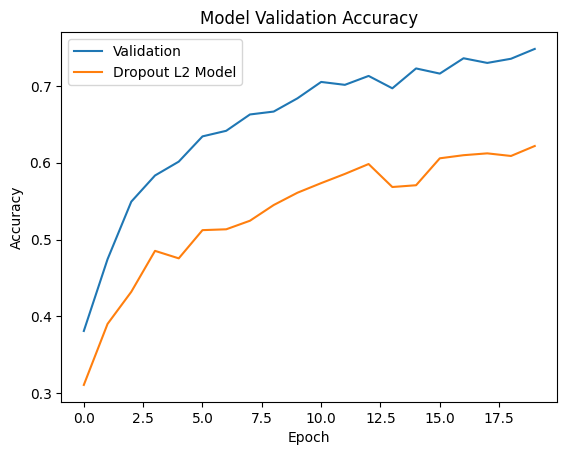

In [ ]:
# Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)
print('Comparison of Dropout L2 Model with validation data')
print('')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history_dropout_l2.history['val_accuracy'], label='Dropout L2 Model')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Comparison of all three Model with validation data



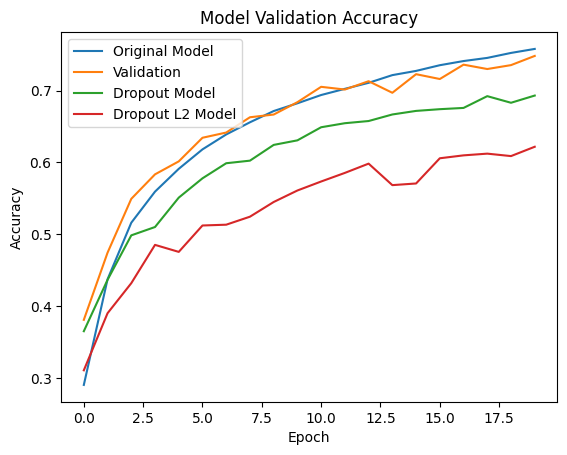

In [ ]:
# Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)
print('Comparison of all three Model with validation data')
print('')
plt.plot(history.history['accuracy'] ,label='Original Model')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Model')
plt.plot(history_dropout_l2.history['val_accuracy'], label='Dropout L2 Model')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# 10. Optimisers 

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [ ]:
##---------Type the code below this line------------------##
# RMSProp with your choice of hyper parameters
model_rmsprop = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

model_rmsprop.compile(
  optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

history_rmsprop = model_rmsprop.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
1358/1358 [==============================] - 41s 29ms/step - loss: 2.9040 - accuracy: 0.2318 - val_loss: 2.3552 - val_accuracy: 0.3402
Epoch 2/20
1358/1358 [==============================] - 33s 24ms/step - loss: 2.2457 - accuracy: 0.3707 - val_loss: 2.0213 - val_accuracy: 0.4348
Epoch 3/20
1358/1358 [==============================] - 33s 24ms/step - loss: 1.9329 - accuracy: 0.4536 - val_loss: 1.8087 - val_accuracy: 0.4890
Epoch 4/20
1358/1358 [==============================] - 33s 24ms/step - loss: 1.7424 - accuracy: 0.5026 - val_loss: 1.8939 - val_accuracy: 0.4630
Epoch 5/20
1358/1358 [==============================] - 34s 24ms/step - loss: 1.6043 - accuracy: 0.5368 - val_loss: 1.5672 - val_accuracy: 0.5400
Epoch 6/20
1358/1358 [==============================] - 33s 24ms/step - loss: 1.4820 - accuracy: 0.5653 - val_loss: 1.4500 - val_accuracy: 0.5750
Epoch 7/20
1358/1358 [==============================] - 39s 28ms/step - loss: 1.3668 - accuracy: 0.5996 - val_loss: 1.4141 -

Comparison of all RMSProp Optimizer Model with validation data


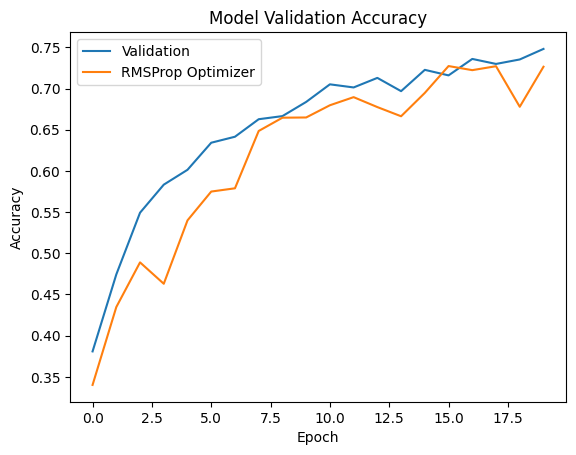

In [ ]:
print('Comparison of all RMSProp Optimizer Model with validation data')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSProp Optimizer')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
print(' ')

In [ ]:
# Adam with your choice of hyper parameters
model_adam = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

model_adam.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

history_adam = model_adam.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)



Epoch 1/20
1358/1358 [==============================] - 36s 26ms/step - loss: 2.5406 - accuracy: 0.3020 - val_loss: 2.0828 - val_accuracy: 0.4189
Epoch 2/20
1358/1358 [==============================] - 35s 25ms/step - loss: 1.9531 - accuracy: 0.4483 - val_loss: 1.7943 - val_accuracy: 0.4940
Epoch 3/20
1358/1358 [==============================] - 35s 25ms/step - loss: 1.6932 - accuracy: 0.5194 - val_loss: 1.5849 - val_accuracy: 0.5454
Epoch 4/20
1358/1358 [==============================] - 36s 26ms/step - loss: 1.5223 - accuracy: 0.5585 - val_loss: 1.4621 - val_accuracy: 0.5691
Epoch 5/20
1358/1358 [==============================] - 35s 25ms/step - loss: 1.4120 - accuracy: 0.5863 - val_loss: 1.3748 - val_accuracy: 0.5970
Epoch 6/20
1358/1358 [==============================] - 40s 29ms/step - loss: 1.3263 - accuracy: 0.6092 - val_loss: 1.2783 - val_accuracy: 0.6202
Epoch 7/20
1358/1358 [==============================] - 35s 26ms/step - loss: 1.2384 - accuracy: 0.6322 - val_loss: 1.2200 -

Comparison of all Adam Optimizer Model with validation data


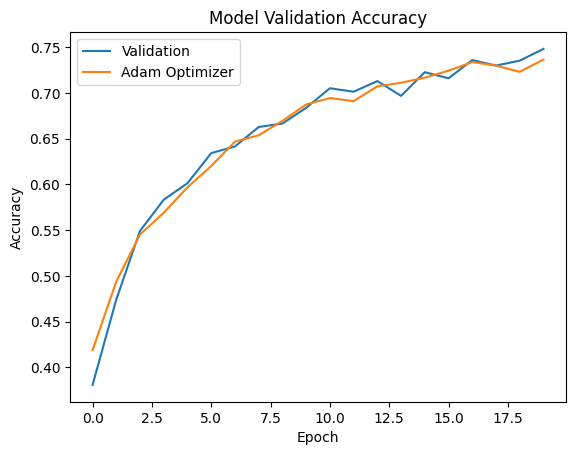

In [ ]:
print('Comparison of all Adam Optimizer Model with validation data')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history_adam.history['val_accuracy'], label='Adam Optimizer')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
print(' ')

Comparison of all three Model with validation data



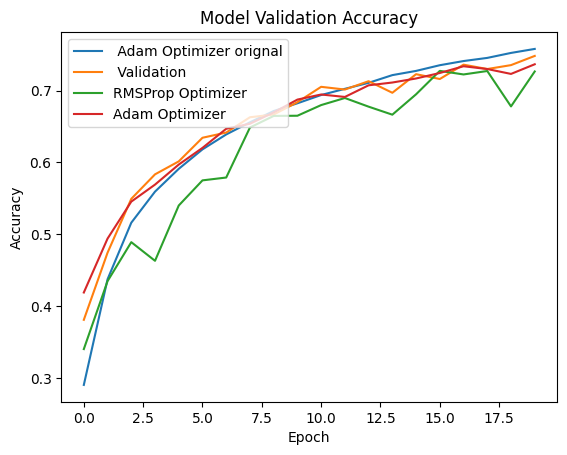

In [ ]:
# Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)
print('Comparison of all three Model with validation data')
print('')
plt.plot(history.history['accuracy'] ,label=' Adam Optimizer orignal')
plt.plot(history.history['val_accuracy'], label=' Validation')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSProp Optimizer')
plt.plot(history_adam.history['val_accuracy'], label='Adam Optimizer')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# 11. Conclusion

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


 
                           CHANGE IN Regularisations                            
 


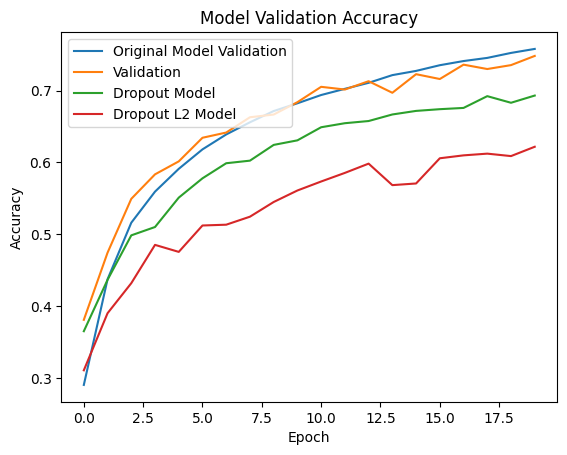

In [ ]:
print(' ')
##---------Type the code below this line------------------##

print(f"\033[1m{'CHANGE IN Regularisations'.center(80)}\033[0m")
print(' ')
# Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)
plt.plot(history.history['accuracy'] ,label='Original Model Validation')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Model')
plt.plot(history_dropout_l2.history['val_accuracy'], label='Dropout L2 Model')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
print(' ')

                                CHNAGE IN Layer                                 
 


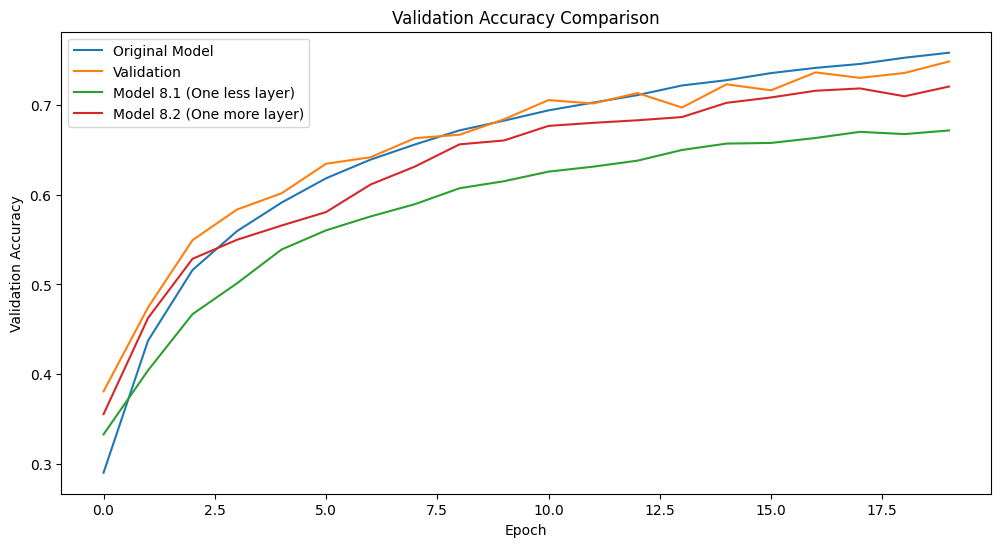

In [ ]:
# Plot the comparison
print(f"\033[1m{'CHNAGE IN Layer'.center(80)}\033[0m")
print(' ')
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'] ,label='Original Model ')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history_8_1.history['val_accuracy'], label='Model 8.1 (One less layer)')
plt.plot(history_8_2.history['val_accuracy'], label='Model 8.2 (One more layer)')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


                              CHNAGE IN Optimisers                              
 


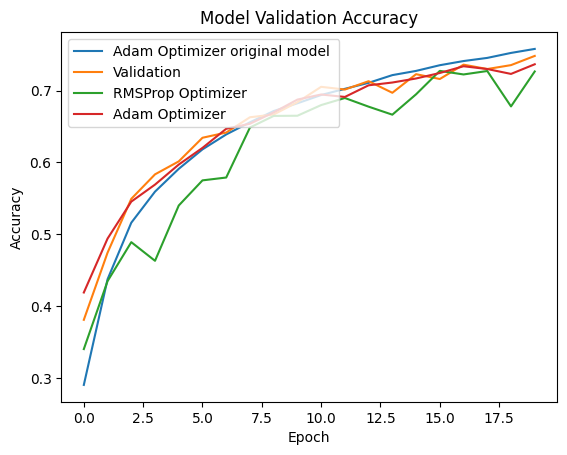

In [ ]:
# Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)
print(f"\033[1m{'CHNAGE IN Optimisers'.center(80)}\033[0m")
print(' ')
plt.plot(history.history['accuracy'] ,label='Adam Optimizer original model ')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSProp Optimizer')
plt.plot(history_adam.history['val_accuracy'], label='Adam Optimizer')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

                Comparison of all the Model with validation data                


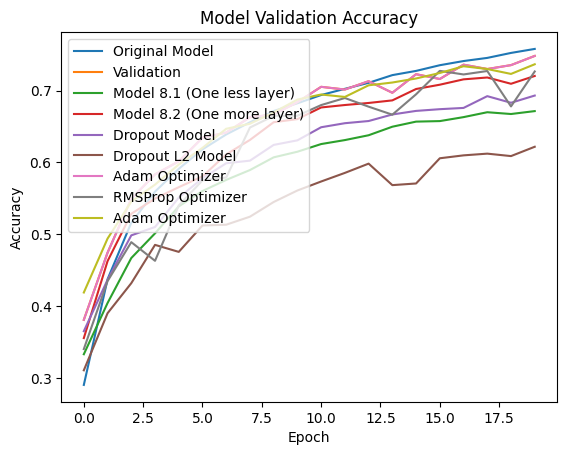

In [ ]:
print(f"\033[1m{'Comparison of all the Model with validation data'.center(80)}\033[0m")

plt.plot(history.history['accuracy'] ,label='Original Model ')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history_8_1.history['val_accuracy'], label='Model 8.1 (One less layer)')
plt.plot(history_8_2.history['val_accuracy'], label='Model 8.2 (One more layer)')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Model')
plt.plot(history_dropout_l2.history['val_accuracy'], label='Dropout L2 Model')
plt.plot(history.history['val_accuracy'], label='Adam Optimizer')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSProp Optimizer')
plt.plot(history_adam.history['val_accuracy'], label='Adam Optimizer')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

**Conclusion:**
Based on the experiments conducted, the following observations are made:
- The addition of Dropout regularization layers it degraded the model's performance in terms of validation accuracy.
- The L2 regularizer further degraded the model's performance, indicating its effectiveness in preventing overfitting.
- Among the optimizers tested, Adam consistently demonstrated better performance than RMSprop, achieving higher validation accuracy.
Therefore, the optimal model configuration for this dataset consists of:
- The Adam optimizer.
This configuration provides a balance between model complexity and generalization ability, resulting in a more robust and effective model.